<a href="https://colab.research.google.com/github/848498/census-income/blob/main/census_income_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sb

%matplotlib inline



In [ ]:
cens = pd.read_csv("adult.csv.zip", names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', \
                                      'marital_status', 'occupation', 'relationship', 'race', 'sex', \
                                      'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

In [ ]:
cens.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [ ]:
cens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       32562 non-null  object
 2   fnlwgt          32562 non-null  object
 3   education       32562 non-null  object
 4   education_num   32562 non-null  object
 5   marital_status  32562 non-null  object
 6   occupation      32562 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  object
 9   sex             32562 non-null  object
 10  capital_gain    32562 non-null  object
 11  capital_loss    32562 non-null  object
 12  hours_per_week  32562 non-null  object
 13  native_country  32562 non-null  object
 14  income          32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [ ]:
n_records = cens.shape[0]
n_features = cens.shape[1]
n_greater_50k = cens[cens['income'] == ' <=50K'].shape[0]
n_at_most_50k = cens[cens['income'] == ' >50K'].shape[0]
greater_percent =  (n_greater_50k / n_records) * 100

print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32562
Total number of features: 15
Individuals making more than $50k: 0
Individuals making at most $50k: 0
Percentage of individuals making more than $50k: 0.00%


In [ ]:
cens.drop('education', inplace=True,axis=1)
cens.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [ ]:
cens.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
print("Before removing duplicates:", cens.duplicated().sum())
cens = cens[~cens.duplicated()]
print("After removing duplicates:", cens.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [ ]:
cens.sex.value_counts()

Male      21775
Female    10762
sex           1
Name: sex, dtype: int64

In [ ]:
columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for column in columns:
    cens[column] = cens[column].str.strip()

In [ ]:
cens.sex.value_counts()

Male      21775
Female    10762
sex           1
Name: sex, dtype: int64

In [ ]:
cens.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
workclass               1
Name: workclass, dtype: int64

In [ ]:
change_columns = ['workclass', 'occupation', 'native_country']
for column in change_columns:
        cens[column] = cens[column].replace({'?': 'Unknown'})

In [ ]:
cens.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
workclass               1
Name: workclass, dtype: int64

In [ ]:
cens.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32538,32538,32538,32538,32538,32538,32538,32538,32538,32538,32538,32538,32538,32538
unique,74,10,21649,17,8,16,7,6,3,120,93,95,43,3
top,36,Private,123011,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,22673,13,10494,14970,4136,13187,27795,21775,29825,31018,15204,29153,24698


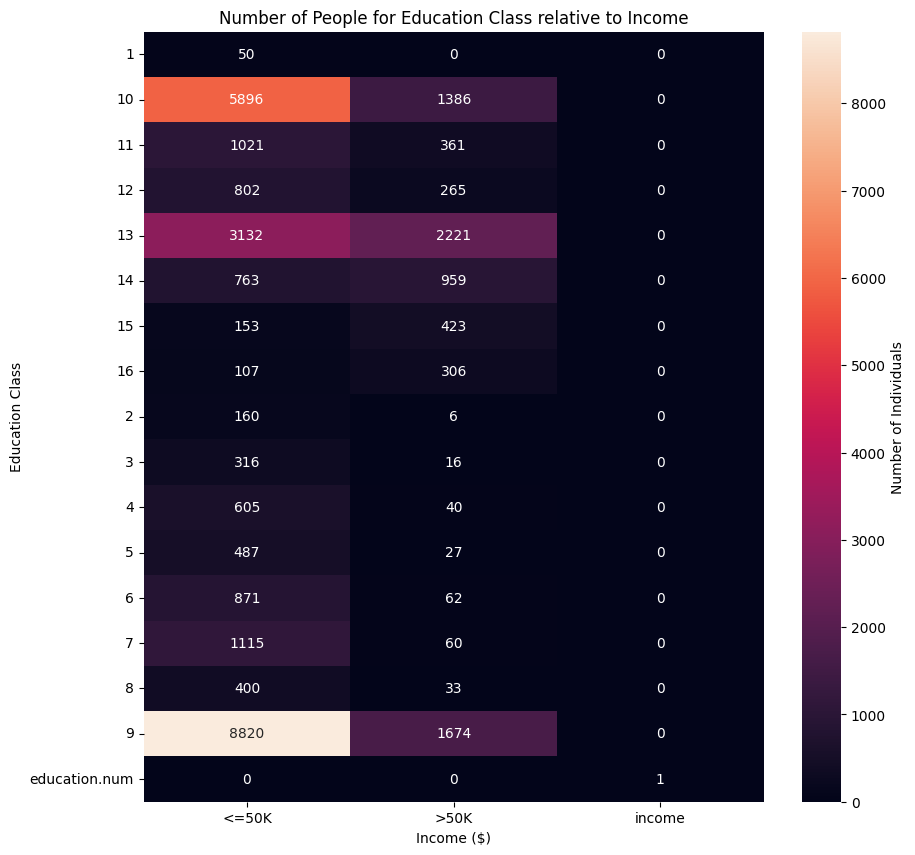

In [ ]:
plt.figure(figsize=[10,10])

ct_counts = cens.groupby(['education_num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education_num', columns = 'income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

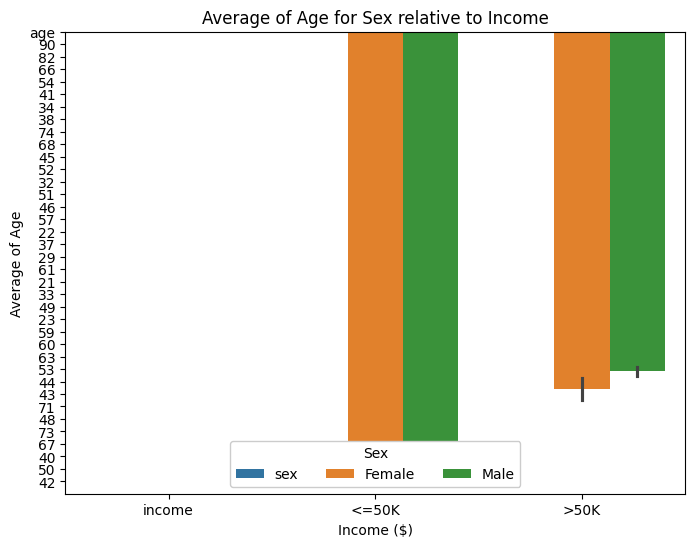

In [ ]:
plt.figure(figsize=[8,6])
ax = sb.barplot(data = cens, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

<ipython-input-23-a61f434f9a3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=cens, x='income', y='hours_per_week', palette='YlGnBu')


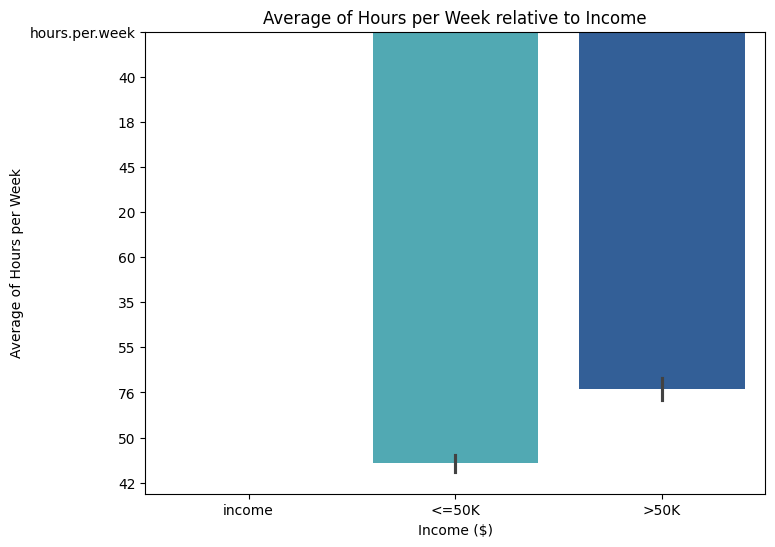

In [ ]:
plt.figure(figsize=[8,6])
sb.barplot(data=cens, x='income', y='hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt' ]
scaler = MinMaxScaler()
cens_prep[numerical] = scaler.fit_transform(cens_prep[numerical])

In [ ]:
cens.sample(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
23495,20,State-gov,177787,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K
4259,20,Private,266015,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
8549,23,Private,74568,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
cens_prep['sex'] = cens_prep.sex.replace({"Female": 0, "Male": 1})
cens_prep['income'] = cens_prep.income.replace({"<=50K": 0, ">50K": 1})

cens_prep = pd.get_dummies(cens_prep)

In [ ]:
encoded = list(columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

8 total features after one-hot encoding.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [ ]:
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)

    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install matplotlib
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sb

feat_imp = ...
plt.figure(figsize=[20,6])
sb.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13)
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')
